In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

# warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Checking the sizes
print(f"Training data size: {len(X_train)}")
print(f"Testing data size: {len(X_test)}")

# Checking the shape
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data size: 60000
Testing data size: 10000
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


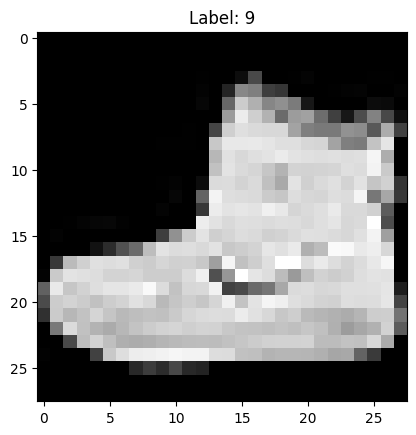

In [3]:
# Visualizing a single image
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

In [4]:
# Feature scaling
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
# Reshaping the input data
X_train_new = X_train.reshape(len(X_train), 28 * 28)
X_test_new = X_test.reshape(len(X_test), 28 * 28)

In [6]:
# Model: Simple ANN
Model1 = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

Model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Training the model
Model1.fit(X_train_new, y_train, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7465 - loss: 0.7617
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8396 - loss: 0.4710
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8495 - loss: 0.4357
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8527 - loss: 0.4272
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8584 - loss: 0.4107


In [7]:
# Evaluating the model
test_loss, test_acc = Model1.evaluate(X_test_new, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8491 - loss: 0.4350
Test accuracy: 84.33%


In [8]:
# Predictions
y_pred1 = Model1.predict(X_test_new)
y_pred_label1 = [np.argmax(i) for i in y_pred1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


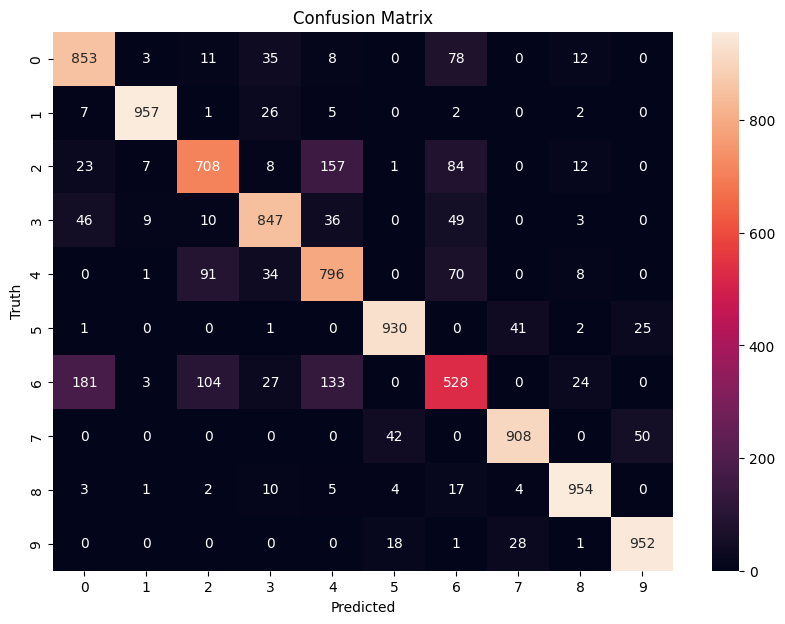

In [9]:
# Confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_label1)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("Confusion Matrix")
plt.show()

In [10]:
# Model: Dense ANN
Model2 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

Model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Training the Dense ANN
Model2.fit(X_train_new, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7795 - loss: 0.6370
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8584 - loss: 0.3914
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8757 - loss: 0.3463
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8825 - loss: 0.3193
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8894 - loss: 0.2990


In [11]:
# Evaluating the Dense ANN
test_loss2, test_acc2 = Model2.evaluate(X_test_new, y_test)
print(f"Dense ANN Test accuracy: {test_acc2 * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8639 - loss: 0.3782
Dense ANN Test accuracy: 86.41%


### make other things here like confusion matrix etc for Dense ANN
